``Tensorflow`` is a library for both machine and deep learning. ``Keras`` is an API designed for deep learning and for human, now it has been included in Tensorflow library.

``MNIST`` is a dataset that was built-in keras, it contains 60,000 training data and 10,000 test sets 28*28 example of handwriting photo.

Supplementing, ``CIFAR10`` also is a dataset that built-in keras, it commonly uses for image classifying, it consists 60,000 32*32 colour images in 10 classes, 6,000 per class, 50,000 training images and 10,000 test image.

``Matplotlib`` is a Python graphical, data visualization API.

In [1]:
from tensorflow.keras.datasets import mnist # , cifar10
from matplotlib import pyplot as plt

Loading both training and test data.

MNIST

``(x_train, y_train), (x_test, y_test) = mnist.load_data()``

CIFA10

``(x_train, y_train), (x_test, y_test) = cifar10.load_data()``

In [2]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

Importing keras's models and layers to construct neural networks.

In [3]:
from tensorflow.keras import models, layers

Using ``.shape`` to check loaded dataset volume and size.

In [4]:
X_train.shape

(60000, 28, 28)

Building neural network using ``models.Sequential()``.

``Sequential()`` model

A ``Sequential`` model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor.

``layers API``

Layers are the basic building blocks of neural networks. A layer consists of a tensor-in tensor-out computation function(the layer's ``call`` method) and some state, held in Tensorflow variables(the ``layer``'s weights).
A ``Layers`` instance is callable, much like a function.

``Dense layer``, ``.Dense()``

Just your regular densely-connected NN layer.

```
layers.Dense(
    units,
    activation="...",
    use_bias=True,
    kernel_initializer="...",
    bias_initializer="zeros",
    kernel_regularizer=None,
    bias_regularizer=None,
    activity_regularizer=None,
    kernel_constraint=None,
    bias_constraint=None,
    **kwargs # Popular kwarg "input_shape"
)
```

``units``

Positive integer, dimensionality of the output space.

``activation``

Activation function to use.

``use_bias``

Boolean, whether the layer uses a bias vector.

``kernel_initializer``

Initializer fo the ``kernel`` weights matrix.

``bias_initializer``

Initializer for the bias vector.

``kernel_regularizer``

Regularizer function applied to the ``kernel`` weights matrix.

``bias_regularizer``

Regularizer function applied to bias vector.

``activity_regularizer``

Regularizer function applied to the output of the layer(its "activation").

``kernel_constraint``

Constraint function applied to the ``kernel`` weights matrix.

``bias_constraint``

Constraint function applied to the bias vector.

``Input shape``, ``input_shape``

The most common situation would be a 2D input with shape
``(batch_size, input_dim)``.

``Output shape``

For a 2D input with shape ``(batch_size, input_dim)``, the output would have shape ``(batch_size, units)``.

``activation``

Availables,

``relu``

Applies the rectified linear unit activation function.

``sigmoid``

Sigmoid activation function ``sigmoid(x) = 1 / (1 + exp(-x))``.

``softmax``

Softmax converts a vector of values to a probability distribution.
The elements of the output vector are in range(0, 1) and sum to 1.

Softmax is often used as the activation for the last layer of a classification network because the result could be interpreted as a probability distribution.

The softmax of each vector x is computed as ``exp(x) / tf.reduce_sum(exp(x))``


``softsign``

Softsign activation function, softsign(x) = x / (abs(x) + 1).

``tanh``

Hyperbolic tangent activation function.

``selu``

The Scaled Exponential Linear Unit(SELU) activation function is defined as:

``
if x > 0: return scale * x

if x < 0: return scale * alpha * (exp(x) - 1)

``

where ``alpha`` and ``scale`` are pre-defined constants (``alpha=1.67326324`` and ``scale=1.05070098``).

Basically, the SELU activation function multiplies ``scale`` (> 1) with the output of the ``tf.keras.activations.elu`` function to ensure a slope larger than one for positive inputs.

``elu``

Exponential Linear Unit.

The exponential linear unit (ELU) with ``alpha > 0`` is: ``x`` if ``x > 0`` and ``alpha * (exp(x) - 1)`` if ``x < 0`` The ELU hyperparameter ``alpha`` controls the value to which an ELU saturates for negative net inputs. ELUs diminish the vanishing gradient effect.

``exponential``

Exponential activation function.

Returns

Tensor with exponential activation: ``exp(x)``.

Noted that there are ``advance activation`` layers, references when needed. 

``Add layer``, ``.Add()``, ``.add()``

Layer that adds a list of inputs.
It takes as input a list of tensors, all of the same shape, and returns a single tensor (also of the same shape).

In [5]:
# NN, Neural Network

NN = models.Sequential()

NN.add(layers.Dense(128, activation="relu", input_shape=(28 * 28,)))
NN.add(layers.Dense(64, activation="relu")) # relu, LeakyRelu
NN.add(layers.Dense(10, activation="softmax"))

``Conv2D layer``, ``Conv2D()``

2D convolution layer(e.g. spatial convolution over images).

This layer creates a convolution kernel that is convolved with the layer input to produce a tensor of outputs.

```
Conv2D(
    filters, kernel_size,
   
    activation="..."

    kernel_initializer="..."
    
    **kwargs # input_shape="..."
)
```

Noted that there are more function can be used, references when needed.

``filters``

Integer, the dimensionality of the output space(i.e. the number of output filters in the convolution).

``kernel_size``

An integer or tuple/list of 2 intergers, specifying the height and width of the 2D convolution window. Can be a single integer to specify the same value for all spatial dimensions.

``Input shape``, ``input_shape``

4+D tensor with shape: ``batch_shape + (channels, rows, cols)`` if ``data_format='channels_first'`` or 4+D tensor with shape: ``batch_shape + (rows, cols, channels)`` if ``data_format='channels_last'``.

``MaxPooling2D layer``, ``MaxPooling2D()``

Max pooling operation for 2D spartial data.

Downsamples the input along its spatial dimensions (height and width) by taking the maximum value over an input window (of size defined by ``pool_size``) for each channel of the input. The window is shifted by ``strides`` along each dimension.

``MaxPooling2D((pool_size))``


``Flatten layer``, ``Flatten()``

Flattens the input. Does not affect the batch size.

Note: if inputs are shaped ``(batch,)`` without a feature axis, then flattening adds an extra channel dimension and output shape is ``(batch, 1)``.


``HeUniform class``, ``he_uniform``

He uniform variance scaling initializer.

Also available via the shortcut function ``tf.keras.initializers.he_uniform``.

Draws samples from a uniform distribution within ``[-limit, limit]``, where ``limit = sqrt(6 / fan_in)`` (``fan_in`` is the number of input units in the weight tensor).

In [6]:
# CNN, Convolution Neural Network

from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

NN = models.Sequential()

NN.add(
    Conv2D(
        32, (3, 3),
        activation="relu",
        kernel_initializer="he_uniform",
        input_shape=(28, 28, 1)
    )
)

NN.add(MaxPooling2D((2, 2)))
NN.add(Flatten())
NN.add(Dense(100, activation="relu", kernel_initializer="he_uniform"))
NN.add(Dense(10, activation="softmax"))

```Optimizers```

Usage with ``compile()`` & ``fit()``

An optimizer is one of the two arguments required for compiling a Keras model.

You can either instantiate an optimizer before passing it to ``model.compile()``, or you can pass it by its string identifier.

Usage in a custom training loop

When writing a custom training loop, you would retrieve gradients via a ``tf.GradientTape instance``, then call ``optimizer.apply_gradients()`` to update your weights:

``Official documentation example``
```
# Instantiate an optimizer.
optimizer = tf.keras.optimizers.Adam()

# Iterate over the batches of a dataset.
for x, y in dataset:
    # Open a GradientTape.
    with tf.GradientTape() as tape:
        # Forward pass.
        logits = model(x)
        # Loss value for this batch.
        loss_value = loss_fn(y, logits)

    # Get gradients of loss wrt the weights.
    gradients = tape.gradient(loss_value, model.trainable_weights)

    # Update the weights of the model.
    optimizer.apply_gradients(zip(gradients, model.trainable_weights))
    
```
Note that when you use ``apply_gradients``, the optimizer does not apply gradient clipping to the gradients: if you want gradient clipping, you would have to do it by hand before calling the method.

Availabel optimizers

```
SGD
RMSprop
Adam
Adadelta
Adagrad
Adamax
Nadam
Ftrl

```

Noted: There are more about optimizers, references when needed.



``Losses``, ``loss``

The purpose of loss functions is to compute the quantity that a model should seek to minimize during training.

``Available losses``

Note that all losses are available both via a class handle and via a function handle. The class handles enable you to pass configuration arguments to the constructor (e.g. ``loss_fn = CategoricalCrossentropy(from_logits=True)``), and they perform reduction by default when used in a standalone way.

There are plenty loss functions, references when needed.

``CategoricalCrossentropy``, ``categorical_crossentropy``

Computes the crossentropy loss between the labels and predictions.

Use this crossentropy loss function when there are two or more label classes. We expect labels to be provided in a ``one_hot`` representation.

``Metrics``, ``metrics``

A metric is a function that is used to judge the performance of your model.

Metric functions are similar to loss functions, except that the results from evaluating a metric are not used when training the model. Note that you may use any loss function as a metric.

There are plenty metrics, references when needed.

``Accuracy class``, ``accuracy``

Calculates how often predictions equal labels.

This metric creates two local variables, ``total`` and ``count`` that are used to compute the frequency with which ``y_pred`` matches ``y_true``. This frequency is ultimately returned as ``binary accuarcy``: and idempotent operation that simply divides ``total`` by ``count``.

if ``sample_weight`` is ``None``, weights default to 1. Use ``sample_weight`` of 0 to mask values.


In [7]:
NN.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

``summary()``

Once a model is "built", you can call its ``summary()`` method to display its contents.

Here, we display the built model, NN's contents, thru ``summary()``.

In [8]:
NN.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 100)               540900    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1010      
Total params: 542,230
Trainable params: 542,230
Non-trainable params: 0
_________________________________________________________________


``Reshape layer``, ``.reshape()``

```
Reshape class

tf.keras.layers.Reshape(target_shape, **kwargs)

```

Layer that reshapes inputs into the given shape.

``Input shape``, ``input_shape``

Arbitrary, although all dimensions in the input shape must be known/fixed. Use the keyword argument ``input_shape`` (tuple of integers, does not include the samples/batch size axis) when using this layer as the first layer in a model.

In [9]:
X_train_NL = X_train.reshape((-1, 28, 28, 1))
X_test_NL = X_test.reshape((-1, 28, 28, 1))

Ensuring the input features are scaled between 0.0 and 1.0.

In [10]:
X_train_NL = X_train_NL.astype("float32") / 255
X_test_NL = X_test_NL.astype("float32") / 255

``One-hot``

In digital circuits and machine learning, a ``one-hot`` is a group of bits among which the legal combinations of values are only those with a single high (1) bit and all the others low (0).

In machine learning, ``one-hot`` encoding is a frequently used method to deal with categorical data. Because many machine learning models need their input variables to be numeric, categorical variables need to be transformed in the pre-processing part.

1 meaning TRUE, 0 meaning FALSE

``to_categorical function``, ``to_categorical()``

Converts a class vector (integers) to binary class matrix.

E.g. for use with ``categorical_crossentropy``.

In [11]:
# OneHot

from tensorflow.keras.utils import to_categorical

Y_train_OneHot = to_categorical(Y_train)
Y_test_OneHot = to_categorical(Y_test)

Checks the reshaped training dataset's volume and size.

In [12]:
X_train_NL.shape

(60000, 28, 28, 1)

In [13]:
result = NN.fit(
            X_train_NL, Y_train_OneHot,
            validation_data = (X_test_NL, Y_test_OneHot),
            epochs = 13, batch_size = 128,
        )

Epoch 1/13
469/469 [==============================] - 8s 4ms/step - loss: 0.1810 - accuracy: 0.9465 - val_loss: 0.0813 - val_accuracy: 0.9766
Epoch 2/13
469/469 [==============================] - 2s 3ms/step - loss: 0.0623 - accuracy: 0.9814 - val_loss: 0.0576 - val_accuracy: 0.9813
Epoch 3/13
469/469 [==============================] - 2s 3ms/step - loss: 0.0399 - accuracy: 0.9882 - val_loss: 0.0518 - val_accuracy: 0.9842
Epoch 4/13
469/469 [==============================] - 2s 3ms/step - loss: 0.0294 - accuracy: 0.9912 - val_loss: 0.0627 - val_accuracy: 0.9812
Epoch 5/13
469/469 [==============================] - 2s 3ms/step - loss: 0.0204 - accuracy: 0.9938 - val_loss: 0.0493 - val_accuracy: 0.9833
Epoch 6/13
469/469 [==============================] - 2s 3ms/step - loss: 0.0153 - accuracy: 0.9955 - val_loss: 0.0421 - val_accuracy: 0.9867
Epoch 7/13
469/469 [==============================] - 2s 3ms/step - loss: 0.0123 - accuracy: 0.9965 - val_loss: 0.0495 - val_accuracy: 0.9854
Epoch 

In [14]:
predict = NN.predict_classes(X_test_NL)

D:\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [15]:
predict_prob = NN.predict(X_test_NL)

In [16]:
predict[0]

7

In [17]:
predict_prob[0]

array([4.9813413e-12, 1.9624254e-11, 6.2349157e-09, 3.3272723e-10,
       2.0762843e-14, 1.8261365e-13, 4.5523281e-18, 1.0000000e+00,
       1.1379503e-11, 1.3365883e-09], dtype=float32)

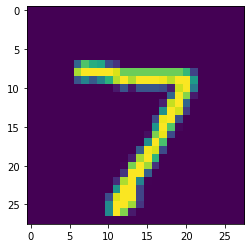

In [18]:
plt.imshow(X_test[0])

In [19]:
predict[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=int64)